# MACHINE LEARNING SYSTEM FOR IRIS FLOWER CLASSIFICATION 

 
# DATA SCIENCE PROJECT TASK 1


# By ADENIYI SAMUEL 
 

# OBJECTIVES

To classify iris flowers among three classes(setosa, versicolor, or virginica), and predicting the type of iris flower using machine learning models

# Importing Neccessary libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET

In [90]:
df = sns.load_dataset("iris")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Exploratory Data Analysis(EDA) 

In [91]:
# Checking the dimension of the data
df.shape

(150, 5)

In [92]:
# checking the distribution of the species of iris data
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

OBSERVATION: THEY ALL HAVE EQUAL NUMBER IN THE DATASET

In [93]:
# checking for missing values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [94]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [95]:
# checking the descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [96]:
# Removing the id column sice it is not needed
#df.drop(["Id"], axis =1, inplace = True)

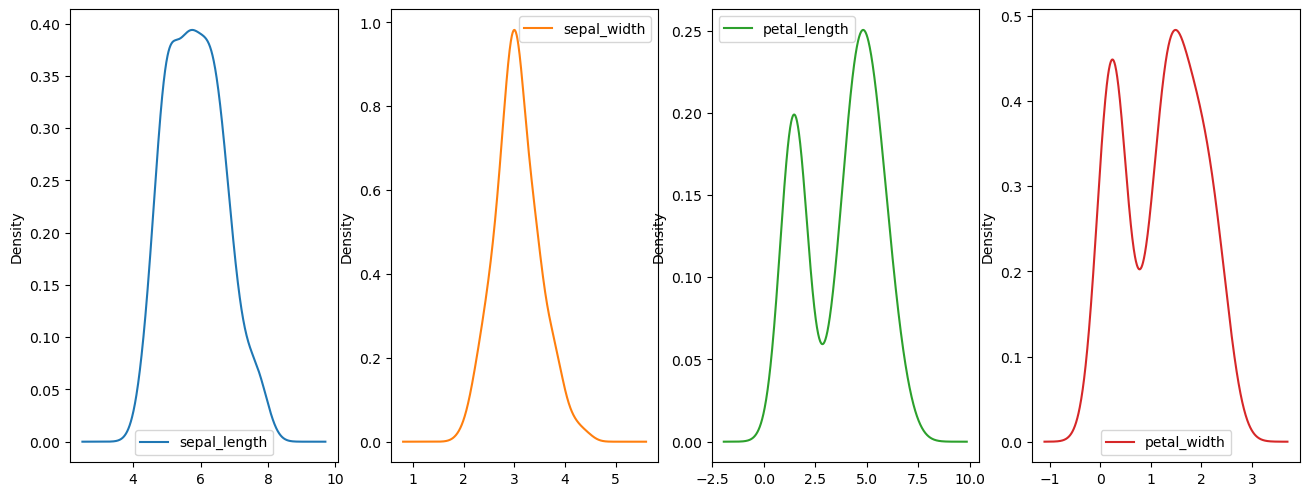

In [97]:
df.plot(kind="density",subplots=True, layout=(3,5),sharex=False)
plt.gcf().set_size_inches(20,20)
plt.show()

obsservation: The sepal width is almost normally distributed followed by the sepal length

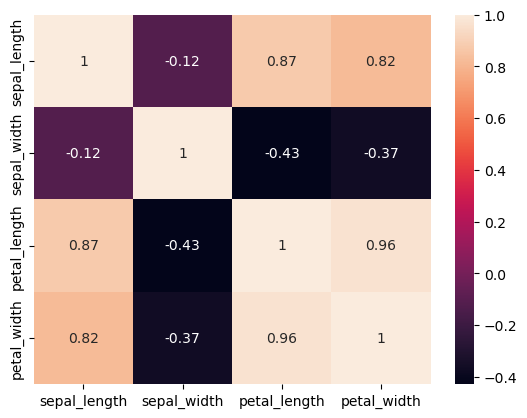

In [98]:
sns.heatmap(df.corr(), annot =True)
plt.show()

 observation: The sepal length and petal length are highly correlated, also the petal length and petal width are highly 
             correlated. Same with sepal length and the petal width

# Data Preprocessing

In [99]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [100]:
# Applying feature encoding on the species features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["species"] = label_encoder.fit_transform(df["species"])

In [101]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [102]:
# declaring the variables
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [103]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [104]:
# standardizing the X matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#### Applying Train Test Split

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

# USING DIFFERENT MODELS ON OUR DATASET

using logistic regression

In [106]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [107]:
# predicting the test set
y_pred1 = log_classifier.predict(X_test)

In [108]:
# Applying K-Fold Cross Validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = log_classifier, X = X_train, y = y_train, cv = 10)
log_mean = accuracies.mean()*100
std = accuracies.std()*100
print(f"Mean accuracy is :{log_mean}%")
print(f"standard deviation is :{std}%")

Mean accuracy is :95.83333333333333%
standard deviation is :5.5901699437494745%


using kernel svm classifier

In [109]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel="rbf",random_state=0)
svm_classifier.fit(X_train,y_train)

SVC(random_state=0)

In [110]:
# predicting the test set
y_pred2 = svm_classifier.predict(X_test)

In [111]:
# Applying K-Fold Cross Validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
svm_mean = accuracies.mean()*100
std = accuracies.std()*100
print(f"Mean accuracy is :{svm_mean}%")
print(f"standard deviation is :{std}%")

Mean accuracy is :96.66666666666666%
standard deviation is :5.527707983925667%


using Random forest classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(n_estimators=10, criterion="entropy",random_state=0)
random_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [113]:
# predicting the test set
y_pred4 = random_classifier.predict(X_test)

In [114]:
# Applying K-Fold Cross Validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = random_classifier, X = X_train, y = y_train, cv = 10)
rf_mean = accuracies.mean()*100
std = accuracies.std()*100
print(f"Mean accuracy is :{rf_mean}%")
print(f"standard deviation is :{std}%")

Mean accuracy is :96.66666666666666%
standard deviation is :5.527707983925667%


Using xgboost classifier

In [115]:
# fitting the Xgboost to the training set
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [116]:
# predicting the test set
y_pred5 = xgb_classifier.predict(X_test)

In [117]:
# Applying K-Fold Cross Validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 10)
xgb_mean = accuracies.mean()*100
std = accuracies.std()*100
print(f"Mean accuracy is :{xgb_mean}%")
print(f"standard deviation is :{std}%")

Mean accuracy is :95.83333333333334%
standard deviation is :6.718548123582124%


# COMPARING OUR MODELS

Random forest and Kernel SVM both have the same accuracy and likewise the best accuracy with as low standard deviation
of the accuracies over 10 iterations
so we'll select random forest classifier